
# KAIST Summer Session 2018

## CIFAR10 Classifier using Convolutional Neural Network (08.20.2018)

- CIFAR10 dataset has the classes: airplane’, automobile’,‘bird’,‘cat’,‘deer’, ‘dog’,‘frog’,‘horse’,‘ship’, truck’.
- This code is adapted from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

### 0. Data Preparation

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


- Let's look inside the MNIST dataset

      truck         dog       horse       truck


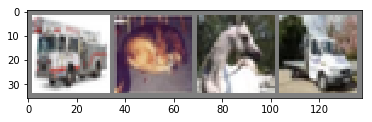

In [17]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('     ','       '.join('%5s' % classes[labels[j]] for j in range(4)))

### 1. Define a Convolution Neural Network
- The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

### (Exercise 1)
- Define your own convolutional neural network

In [26]:
class Net(nn.Module):
    def __init__(self):        
#################   Write Here   ######################
        super(Net, self).__init__()






#######################################################


    def forward(self, x):
#################   Write Here   ######################






        return x

#######################################################

### 2. Define a Loss Function and Optimizer

### (Exercise 2)

In [20]:
# Instantiate NN model
net = Net()



# Set loss and optimizer function
#################   Write Here   ######################

criterion = 
optimizer = 

#######################################################

### 3. Training

### (Exercise 3)

In [21]:
n_epochs = 2

for epoch in range(n_epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # forward + backward + optimize
        
#################   Write Here   ###################### 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
               

            
            
            
#######################################################

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.237
[1,  4000] loss: 1.906
[1,  6000] loss: 1.692
[1,  8000] loss: 1.606
[1, 10000] loss: 1.517
[1, 12000] loss: 1.460
[2,  2000] loss: 1.408
[2,  4000] loss: 1.369
[2,  6000] loss: 1.326
[2,  8000] loss: 1.295
[2, 10000] loss: 1.311
[2, 12000] loss: 1.278
Finished Training


### 4. Evaluation

In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 47 %
Accuracy of   car : 55 %
Accuracy of  bird : 48 %
Accuracy of   cat : 45 %
Accuracy of  deer : 45 %
Accuracy of   dog : 45 %
Accuracy of  frog : 62 %
Accuracy of horse : 57 %
Accuracy of  ship : 83 %
Accuracy of truck : 52 %


- Let's see how the model works well

Truth:       cat       ship       ship      plane
Predicted:   cat       ship       ship      plane


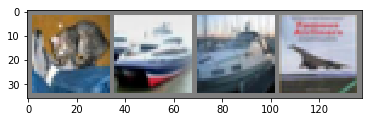

In [25]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('Truth:    ', '      '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted:', '      '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))